# Entrenamiento de red ResNet para clasificación de signo a texto.

---
---

# Índice.

- [Configuración](#configuración)
  - [Configuración de la red](#configuración-de-la-red)
  - [Dispositivo](#dispositivo-en-el-que-se-ejecuta-la-red)
- [Carga de datos](#carga-de-datos)
- [Entrenamiento](#entrenamiento)
  - [Creación del modelo](#creacion-del-modelo-a-entrenar)
  - [Entrenamiento](#entrenamiento)
  - [Gráfica de costes](#plot-de-los-costes-según-el-epoch)
- [Prueba](#prueba)
  - [Comprobando accuracy en batch](#comprobando-accuracy-en-un-batch)
  - [Comprobando una etiqueta específica](#comprobando-una-etiqueta-en-concreto)
- [Exportamos modelo](#exportamos-modelo)

## Configuración

---

In [1]:
%matplotlib inline

### Hiperparámetros de la red

In [2]:
from config.const import (
    LEARNING_RATE,
    BATCH_SIZE,
    NUM_EPOCHS,
    TRAIN_SPLIT,
    IMAGE_SIZE,
    WIDTH_MULTIPLIER,
)


In [3]:
print(
    f"LEARNING_RATE: {LEARNING_RATE}. BATCH_SIZE: {BATCH_SIZE}. NUM_EPOCHS: {NUM_EPOCHS}. TRAIN_SPLIT: {TRAIN_SPLIT}. IMAGE_SIZE: {IMAGE_SIZE}. NUMBER OF CONCATENATED IMAGES: {WIDTH_MULTIPLIER}"
)


LEARNING_RATE: 0.001. BATCH_SIZE: 128. NUM_EPOCHS: 25. TRAIN_SPLIT: 0.7. IMAGE_SIZE: 224. NUMBER OF CONCATENATED IMAGES: 3


### Configuración de torch. 

In [4]:
from config.torch import get_device, get_transform

In [5]:
device = get_device()
print(f"Device: {device}")

Device: cuda


In [6]:
single_image_transform = get_transform(IMAGE_SIZE, WIDTH_MULTIPLIER)
single_image_transform


Compose(
    Resize(size=(224, 672), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

### Elección del dataset

In [7]:
from config.dataset import get_dataset_info, get_datasets

In [8]:
datasets = get_datasets()
print("Available local datasets: ")
datasets

Available local datasets: 


{'WLASL': {'name': 'WLASL_frames_100', 'path': 'WLASL/frames_5'},
 'animals': {'name': 'animals_simple', 'path': 'animals/all'},
 'signs': {'name': 'signs', 'path': 'signs'}}

In [9]:
DATASET = "WLASL"
data_path, model_path = get_dataset_info(DATASET)
print(f"Dataset: {DATASET}. Data path: {data_path}. Model path: {model_path}")

Dataset: WLASL. Data path: d:\Proyectos\TFG\Sign2Text\Project\data\WLASL\frames_5. Model path: d:\Proyectos\TFG\Sign2Text\Project\models\resnet_WLASL_frames_100.pth


## Carga de datos

---

In [10]:
from utils.loader import split_dataset, get_dataset

### Se carga el dataset

In [11]:
dataset, classes = get_dataset(data_path, single_image_transform)

print(f"Some classes in dataset: {classes[:5]}")

Some classes in dataset: ['before', 'book', 'chair', 'computer', 'drink']


### Ejemplo de entrada y salida del dataset

In [12]:
from utils.output import show_image
from numpy.random import randint

Target of image is: 'computer'


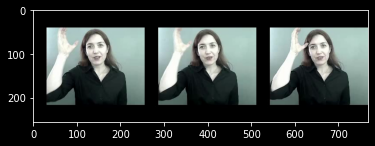

In [13]:
rand_index = randint(0, len(dataset))
img, target = dataset.imgs[rand_index]

print(f"Target of image is: '{classes[target]}'")
show_image(img)

### Divide el dataset en entrenamiento y test

In [14]:
train_loader, test_loader = split_dataset(dataset, TRAIN_SPLIT, BATCH_SIZE)

print(
    f"Number of batches for tranning: {len(train_loader)}. Number of batches for testing: {len(test_loader)}. ({BATCH_SIZE} images/batch)"
)

Number of batches for tranning: 1. Number of batches for testing: 1. (128 images/batch)


## Entrenamiento

---

### Creación del model a entrenar


In [15]:
from lib.model import create_model

In [16]:
num_classes = len(classes)
model = create_model(num_classes)

### Entrenamiento

In [17]:
from lib.train import train_model

In [18]:
costs = train_model(
    model,
    train_loader=train_loader,
    device=device,
    learning_rate=LEARNING_RATE,
    num_epochs=NUM_EPOCHS,
)

Training on device: cuda
Cost at epoch 1 is 1.78138
Cost at epoch 2 is 1.60487
Cost at epoch 3 is 1.55500
Cost at epoch 4 is 1.54846
Cost at epoch 5 is 1.53423
Cost at epoch 6 is 1.50067
Cost at epoch 7 is 1.45699
Cost at epoch 8 is 1.41350
Cost at epoch 9 is 1.37452
Cost at epoch 10 is 1.34105
Cost at epoch 11 is 1.31342
Cost at epoch 12 is 1.29043
Cost at epoch 13 is 1.26856
Cost at epoch 14 is 1.24427
Cost at epoch 15 is 1.21660
Cost at epoch 16 is 1.18722
Cost at epoch 17 is 1.15909
Cost at epoch 18 is 1.13423
Cost at epoch 19 is 1.11299
Cost at epoch 20 is 1.09412
Cost at epoch 21 is 1.07602
Cost at epoch 22 is 1.05727
Cost at epoch 23 is 1.03734
Cost at epoch 24 is 1.01670
Cost at epoch 25 is 0.99637


### Plot de los costes según el epoch

In [19]:
from utils.output import plot_costs

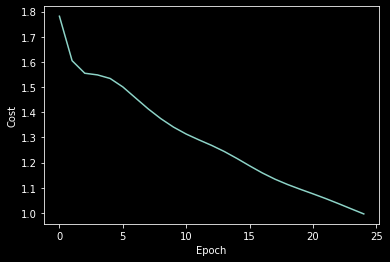

In [20]:
plot_costs(costs)

## Prueba

---

In [21]:
from lib.test import check_accuracy, predict_class

### Comprobando accuracy en un batch

Checking accuracy on TRAIN set batch
Images grid


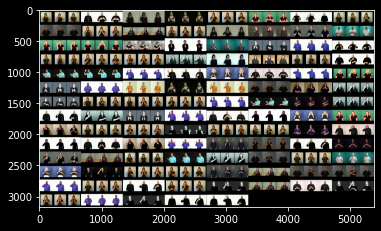

Predictions for batch 1 
['chair', 'before', 'book', 'drink', 'book', 'before', 'computer', 'chair', 'before', 'book', 'drink', 'book', 'chair', 'drink', 'computer', 'before', 'before', 'computer', 'computer', 'chair', 'computer', 'drink', 'before', 'computer', 'book', 'book', 'book', 'drink', 'drink', 'drink', 'book', 'computer', 'computer', 'computer', 'before', 'drink', 'drink', 'computer', 'before', 'drink', 'book', 'computer', 'computer', 'chair', 'computer', 'before', 'chair', 'drink', 'book', 'book', 'book', 'book', 'before', 'before', 'computer', 'drink', 'drink', 'drink', 'book', 'before', 'computer', 'drink', 'computer', 'before', 'chair', 'chair', 'book', 'computer', 'book', 'chair', 'before', 'drink', 'drink', 'computer', 'before', 'computer', 'drink', 'chair', 'computer', 'chair', 'drink', 'drink', 'chair', 'before', 'computer', 'before', 'book', 'before', 'book', 'before', 'book', 'book', 'chair', 'drink', 'before', 'before', 'before', 'book', 'drink', 'book', 'drink', 'd

In [22]:
print("Checking accuracy on TRAIN set batch")
check_accuracy(train_loader, model, classes, device)

Checking accuracy on TEST set batch
Images grid


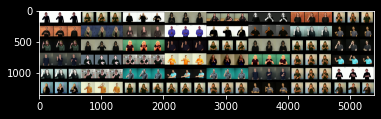

Predictions for batch 1 
['drink', 'chair', 'computer', 'drink', 'drink', 'drink', 'drink', 'book', 'chair', 'drink', 'computer', 'before', 'computer', 'before', 'drink', 'before', 'before', 'chair', 'chair', 'before', 'chair', 'book', 'chair', 'drink', 'drink', 'book', 'computer', 'computer', 'before', 'chair', 'book', 'before', 'drink', 'computer', 'chair', 'before', 'before', 'drink', 'book', 'before', 'book', 'computer', 'chair', 'chair', 'book', 'book', 'book', 'chair']
Ground truth for batch 1
['drink', 'chair', 'computer', 'book', 'computer', 'drink', 'drink', 'book', 'chair', 'drink', 'book', 'book', 'drink', 'drink', 'before', 'before', 'computer', 'chair', 'book', 'before', 'chair', 'book', 'chair', 'drink', 'computer', 'before', 'book', 'chair', 'book', 'chair', 'book', 'computer', 'computer', 'drink', 'drink', 'computer', 'drink', 'computer', 'book', 'before', 'before', 'drink', 'chair', 'chair', 'book', 'before', 'book', 'drink']
---------------------------------


Got 23 

In [23]:
print("Checking accuracy on TEST set batch")
check_accuracy(test_loader, model, classes, device)

### Comprobando una etiqueta en concreto

In [24]:
label = "apple"

In [25]:
print(f"Prediction for {label} and TRAIN set")
predict_class(train_loader, model, classes, label, device)

Prediction for apple and TRAIN set


In [26]:
print(f"Prediction for {label} and TEST set")
predict_class(test_loader, model, classes, label, device)

Prediction for apple and TEST set


## Exportamos modelo

---

In [27]:
from lib.model import export_model

In [28]:
export_model(model, model_path)
print(f"Model exported to {model_path}")

Model exported to d:\Proyectos\TFG\Sign2Text\Project\models\resnet_WLASL_frames_100.pth
